# Arg Antenna exploration and processing
La idea es

* Catalogar antenas por sus provincias 
* Graficar el mapa de Arg con sus antennas
* Graficar el mapa de GC
* limpiar aquellas que caigan "al agua"
* Catalogar las antenas como pertenecientes o no a regiones del *"Gran Chaco"* arg
* dibujar la zona epidemica

# Comparar con el file surrogado


## definicion utilizada
CEL_ID es el hash de la antenna, cel_description es el "barrio de la antenna" y lat, long as usual

### input head

In [294]:
!head data/celdas.csv

CEL_ID,CEL_DESCRIPTION,LATITUD,LONGITUD
CO534D,CHATEAU - VILLA AGUR,-31.3703,-64.2403
CO534F,CHATEAU - VILLA AGUR,-31.3703,-64.2403
CO534X,CHATEAU - VILLA AGUR,-31.3703,-64.2403
CO535A,BARRIO EL ROSEDAL,-31.4353,-64.2248
CO535B,BARRIO EL ROSEDAL,-31.4353,-64.2248
CO535C,BARRIO EL ROSEDAL,-31.4353,-64.2248
CO535D,BARRIO EL ROSEDAL,-31.4353,-64.2248
CO535E,BARRIO EL ROSEDAL,-31.4353,-64.2248
CO535X,BARRIO EL ROSEDAL,-31.4353,-64.2248


In [295]:
import numpy as np; 
import pandas as pd; 
import unicodedata;
import matplotlib;
import os
import random
pd.set_option('display.max_rows', 500)
%matplotlib inline
import unicodedata
import geopandas as gpd;
from geopandas.geoseries import *
import shapely


In [296]:
rootdir=os.getcwd()
rootdir = os.path.expanduser('/home/teo/Repositories/Tesis/')
np.random.seed(2015)

In [297]:
global mapa

In [298]:
antennas_file = 'data/celdas.csv'
antennas_file_out = 'data/celdas_limpio.csv'
raw_antennas =  pd.read_csv(antennas_file, 
                            #engine = 'python',
                            error_bad_lines=False, 
                           warn_bad_lines=True)

Skipping line 5040: expected 4 fields, saw 9
Skipping line 5041: expected 4 fields, saw 9
Skipping line 5042: expected 4 fields, saw 9
Skipping line 5401: expected 4 fields, saw 9
Skipping line 5402: expected 4 fields, saw 9
Skipping line 5403: expected 4 fields, saw 9
Skipping line 11626: expected 4 fields, saw 5
Skipping line 11627: expected 4 fields, saw 5
Skipping line 11628: expected 4 fields, saw 5
Skipping line 11629: expected 4 fields, saw 5
Skipping line 11630: expected 4 fields, saw 5
Skipping line 11631: expected 4 fields, saw 5
Skipping line 11632: expected 4 fields, saw 5
Skipping line 25496: expected 4 fields, saw 9
Skipping line 25819: expected 4 fields, saw 5
Skipping line 25820: expected 4 fields, saw 5
Skipping line 45046: expected 4 fields, saw 7
Skipping line 45047: expected 4 fields, saw 7
Skipping line 45048: expected 4 fields, saw 7
Skipping line 45049: expected 4 fields, saw 7
Skipping line 45050: expected 4 fields, saw 7
Skipping line 45051: expected 4 fields, 

# miramos a mano 
las filas rotas y guardamos el output para mirarlas a mano

In [299]:
idle_lines = [25496,25819,25820,57409]
error_lines = idle_lines + range(5040,5043) + range(5401,5404) + range(11626,11633) + range(11626,11633) +\
                range(45046,45053) + range(51932,51939) + range(54418,54425)  + range(57857,57862) 

lines = []
for num in error_lines:
    out = !tail -n+$num $antennas_file | head -n1
    lines += [out[0]]

In [300]:
#nos quedamos con la lista unica
lines_set = set(lines)
lines_set

{"BA784G,CHASCOM\xc3\x9aS 3,'-35,566,667.0000','-579,935.0000'",
 "BA784H,CHASCOM\xc3\x9aS 3,'-35,566,667.0000','-579,935.0000'",
 "BA784I,CHASCOM\xc3\x9aS 3,'-35,566,667.0000','-579,935.0000'",
 "BA784J,CHASCOM\xc3\x9aS 3,'-35,566,667.0000','-579,935.0000'",
 "BA784K,CHASCOM\xc3\x9aS 3,'-35,566,667.0000','-579,935.0000'",
 "BA784L,CHASCOM\xc3\x9aS 3,'-35,566,667.0000','-579,935.0000'",
 "BA784Z,CHASCOM\xc3\x9aS 3,'-35,566,667.0000','-579,935.0000'",
 "CF378G,GALERIAS PACIFICO,'-34,599,091.0000','-58,375,082.0000'",
 "CF378H,GALERIAS PACIFICO,'-34,599,091.0000','-58,375,082.0000'",
 "CF378I,GALERIAS PACIFICO,'-34,599,091.0000','-58,375,082.0000'",
 "CF378J,GALERIAS PACIFICO,'-34,599,091.0000','-58,375,082.0000'",
 "CF378K,GALERIAS PACIFICO,'-34,599,091.0000','-58,375,082.0000'",
 "CF378L,GALERIAS PACIFICO,'-34,599,091.0000','-58,375,082.0000'",
 "CF378Z,GALERIAS PACIFICO,'-34,599,091.0000','-58,375,082.0000'",
 "ME194A,SAN RAFAEL 13,'-34,609,869.0000','-68,311,548.0000'",
 "ME194B,SAN 

In [301]:
#agregamos estas antennas a mano
#pd.concat()

df = [['SE062C','TAPSO, LAVALLE',-27.777,-65.0980],
     ['SC029X','Avda Rivadavia y Med',-34.112,-58.4207],
     ['NQ047X','CERRO BANDERA, PIONE',-38.9587,-69.5138],
     ['ME194C','SAN RAFAEL 13',-38.609,-68.311],
     ['CF378L','GALERIAS PACIFICO',-34.599,-58.375],
     ['BA784L','CHASCOMUS 3',-35.566,-57.993]]
df = pd.DataFrame(df)
df.columns = raw_antennas.columns

raw_antennas = pd.concat([raw_antennas,df],axis=0,ignore_index=True)

In [302]:
# se colo una fila que es una repeticion del header
raw_antennas[raw_antennas['CEL_ID'].str.contains('CEL_I')].index

raw_antennas.ix[64965]

CEL_ID                      CEL_ID
CEL_DESCRIPTION    CEL_DESCRIPTION
LATITUD                    LATITUD
LONGITUD                  LONGITUD
Name: 64965, dtype: object

In [303]:
raw_antennas.drop(64965,axis=0,inplace=True)

## este es el file de la surrogacion de hash de antennas a numeric que usaba caro


In [403]:
## este es el file de la surrogacion de hash de antennas a numeric que usaba caro
antenna_hash_map_file = 'data/surrogated_antennas.txt'
!head $antenna_hash_map_file
!wc -l $antenna_hash_map_file

AA001 3416
B1061 4371
BA001 3020
BA003 1665
BA004 1078
BA006 2679
BA007 778
BA010 3255
BA013 3413
BA015 3169
4520 data/surrogated_antennas.txt


In [404]:
antenna_hash_map =  pd.read_csv(antenna_hash_map_file, sep = " " ,
                            #engine = 'python',
                            header=None, index_col = None )
antenna_hash_map.columns = ['CEL_ID', 'SURR_ID']

In [307]:
antenna_hash_map.shape, raw_antennas.shape

((4520, 2), (69834, 4))

## NULL check - Raw file
resulta que esta lleno de antennas que no tienen lat/long pues son las antennas que vienen de "afuera" i.e. los usuarios de la TelCo realizan un llamado del exterior y el sistema sabe que es su usuario, pero al estar en otro pais, se loggea como la antenna de la compania donde se realizo el llamado, luego no tienen lat/long y son llamados hechos en el exterior veraderamente

Ojo tmb hay antennas locales dropeadas y algunas tipo antennas de 'testeo' o especiales por algun evento masivo

In [309]:
#pasamos columnas lat long a float
ind = pd.to_numeric(raw_antennas['LATITUD'],errors='ignore').isnull()
ind2 = pd.to_numeric(raw_antennas['LONGITUD'],errors='ignore').isnull()
ind3 = raw_antennas['CEL_DESCRIPTION'].isnull()
# raw_antennas[['LONGITUD','LATITUD']].isnull().all(axis=1)
ind4 = ~ind & ind2

In [310]:
test = raw_antennas[ind]
test2 = raw_antennas[ind2]
test3 = raw_antennas[ind3]
test4 = raw_antennas[ind4]

In [311]:
test.sample(200)

,CEL_ID,CEL_DESCRIPTION,LATITUD,LONGITUD
60719,RG093,TDC DINAMARCA,NaN,NaN
55508,IU04,IUSACELL SID 24591,NaN,NaN
19723,TEBARA,TEST BARILOCHE,NaN,NaN
10832,RG261,Peoples,NaN,NaN
26220,CO200,TORRE ANGELA,NaN,NaN
65301,SFTSTB,CELDA TEST SANTA FE,NaN,NaN
31540,PPCDB,PREPAGO CORDOBA,NaN,NaN
62720,BA491,LOMA VERDE,NaN,NaN
5266,CO998B,CELDA PRUEBA CBA,NaN,NaN
10527,TECOMD,TEST BSC COMODORO,NaN,NaN


In [312]:
test2.sample(200)

,CEL_ID,CEL_DESCRIPTION,LATITUD,LONGITUD
31554,PPSLU,PREPAGO SAN LUIS,NaN,NaN
30000,CO028,ORDONEZ J. POSSE,NaN,NaN
32462,PA088,CONHELLO,NaN,NaN
62776,RG281,Fines,NaN,NaN
32510,ERTSTA,CONCORDIA TEST,NaN,NaN
45993,RG487,GUJARAT,NaN,NaN
46088,RG498,TAMINAD,NaN,NaN
31503,TU034,TRANCAS NUEVO,NaN,NaN
56122,RG339,DigiTelcom,NaN,NaN
61127,CTNN2A,CAT_RUTA4,NaN,NaN


In [313]:
test3.shape, test4.shape

((3, 4), (7, 4))

In [314]:
test3

,CEL_ID,CEL_DESCRIPTION,LATITUD,LONGITUD
31604,',NaN,NaN,NaN
31616,',NaN,NaN,NaN
55514,COW11,NaN,NaN,NaN


In [315]:
test4

,CEL_ID,CEL_DESCRIPTION,LATITUD,LONGITUD
17191,',-31.6477,-60.7070,NaN
17193,',-31.6477,-60.7070,NaN
17195,',-31.6477,-60.7070,NaN
17197,',-31.6477,-60.7070,NaN
17199,',-31.6477,-60.7070,NaN
17201,',-31.6477,-60.7070,NaN
26412,',-31.6477,-60.7070,NaN


In [316]:
print(test['LATITUD'].isnull().sum(),test.shape[0])
print(test2['LONGITUD'].isnull().sum(),test2.shape[0])

(1574, 1574)
(1581, 1581)


In [317]:
#dropeamos filas con null en lat o long y guardamos las antennas droppeadas
dropped_antennas  = list(set(test.CEL_ID.values) | set(test2.CEL_ID.values))
len(dropped_antennas)

1573

In [318]:
#para ver cuantas voy a dropear
a = raw_antennas[raw_antennas.isnull().any(axis=1)]
len(a.CEL_ID.unique())

1573

In [319]:
print(raw_antennas.shape)
raw_antennas.dropna(inplace=True)
print(raw_antennas.shape)

(69834, 4)
(68253, 4)


## Delete last char???
from raw_antennas CEL_ID hash since those are in fact equal antennas 

In [320]:
# como caro hablo de filtrar el ultimo caracter del hash_name, sospecho que NO todas las antennas tienen este problema
# y que hay algunas "ya" filtradas del ultimo dataset, i.e. tienen char_length == 5

test = antenna_hash_map['CEL_ID'].apply(lambda x: len(x))

test2 = raw_antennas.copy()
test2['name'] = test2['CEL_ID'].apply(lambda x: x[:-1] if len(x) == 6 else x)
#me quedo con aquellas de len --> 5
test2 = test2[(test2['name'].apply(lambda x: len(x) == 5)).values]
test2 = test2.groupby('name' ).first()
test2['len'] = test2.CEL_ID.map(lambda x: len(x))

test.value_counts(), test2['len'].value_counts()

(5    4520
 Name: CEL_ID, dtype: int64, 6    5399
 5     432
 Name: len, dtype: int64)

In [321]:
antenna_hash_map.head()

,CEL_ID,SURR_ID
0,AA001,3416
1,B1061,4371
2,BA001,3020
3,BA003,1665
4,BA004,1078


In [322]:
test2.head()

,CEL_ID,CEL_DESCRIPTION,LATITUD,LONGITUD,len
name,,,,,
AA001,AA001A,ANTARTIDA ARGENTINA,-64.2544,-56.6488,6
B1061,B1061A,MUNDO MARNO,-36.3390,-56.7468,6
B1062,B1062A,BUNGE RAMALLO,-33.4578,-60.0522,6
BA001,BA001,GOBERNADOR UGARTE,-35.1641,-60.0866,5
BA003,BA003G,25 DE MAYO,-35.4275,-60.1538,6


In [323]:
# algunos chequeos de rigor a ve cuanto se intersecan y cuanto es la union de las 2
len(set(test2.index.values) | set(antenna_hash_map['CEL_ID'])) , len(set(test2.index.values) & set(antenna_hash_map['CEL_ID']))

(5831, 4520)

In [324]:
len(set(test2.index.values)) , len(set(antenna_hash_map['CEL_ID']))

(5831, 4520)

# Problema
Diferencia en el count de c/ datset, entre el raw y el de caro

In [328]:
to_drop

['CF25', 'MROS']

In [332]:
to_drop = raw_antennas[raw_antennas['CEL_ID'].apply(lambda x : len(x)<5)]['CEL_ID'].values
to_drop  = list(set(to_drop))
print('Dropping %s badly hashed ants' %len(to_drop))

raw_antennas = raw_antennas[~raw_antennas['CEL_ID'].isin(to_drop)]

dropped_antennas += (to_drop)

Dropping 2 badly hashed ants


# IMPORTANTE
Los resultados de esta parte son muy importantes para determinar que como agrupar las antennas y para determinar posibles errores futuros en el procesamiento. Pues la *hipotesis* es que el hash de las antenas esta extendido en un caracter por lo cual la base es esencialmente una base con multiples duplicaiciones de antenas (una por c/ caracter excedente) 

In [343]:
raw_antennas['CEL_ID1'] = raw_antennas['CEL_ID'].apply(lambda x: x[:-1] if len(x) == 6 else x)

grouped = raw_antennas.groupby('CEL_ID1')

In [379]:
#a random ant is stripped from its last char and tested to see if its lat/long always matches
total_analyzed = 200
bad_antenna_list = []
for i in range(total_analyzed):
    ant = raw_antennas.sample(1)['CEL_ID'].values[0]
    if len(ant) == 6:
        ant = ant[:-1]
    group1 = grouped.get_group(ant)
    res = ((group1['LATITUD'] == group1.iloc[0]['LATITUD']) & (group1['LONGITUD'] == group1.iloc[0]['LONGITUD'])).all()
    if not(res):
        bad_antenna_list+= [ant]

bad_antennas=len(bad_antenna_list)*1.0        
print('Of {1} antennas {0} were "bad", ratio is {2} \n A sample of 10 hashes is shown:'.format(bad_antennas,total_analyzed,
                                                            bad_antennas/total_analyzed))
bad_antenna_list[0:10]

Of 200 antennas 63.0 were "bad", ratio is 0.315 
 A sample of 10 hashes is shown:


['PA023',
 'SF343',
 'RJ041',
 'C1707',
 'CF898',
 'NQ027',
 'ER059',
 'CF522',
 'C1638',
 'C1461']

In [380]:
#TEST IF lat/longs along stripped antenna hashes are consistent in a random group i.e. all equal to the first row
(group1['LATITUD'] == group1.iloc[0]['LATITUD']) & (group1['LONGITUD'] == group1.iloc[0]['LONGITUD'])

11324     True
11325     True
11326     True
11327     True
11328     True
11329     True
11330     True
20995    False
20996    False
20997    False
20998    False
20999    False
24615    False
24616    False
dtype: bool

In [381]:
print(ant)
raw_antennas[raw_antennas['CEL_ID'].str.contains(ant)]

BA782


,CEL_ID,CEL_DESCRIPTION,LATITUD,LONGITUD,CEL_ID1
11324,BA782A,MIRAMAR 2,-38.2741,-57.8332,BA782
11325,BA782B,MIRAMAR 2,-38.2741,-57.8332,BA782
11326,BA782C,MIRAMAR 2,-38.2741,-57.8332,BA782
11327,BA782D,MIRAMAR 2,-38.2741,-57.8332,BA782
11328,BA782E,MIRAMAR 2,-38.2741,-57.8332,BA782
11329,BA782F,MIRAMAR 2,-38.2741,-57.8332,BA782
11330,BA782X,MIRAMAR 2,-38.2741,-57.8332,BA782
20995,BA782G,MIRAMAR 2,-38.2753,-57.8343,BA782
20996,BA782H,MIRAMAR 2,-38.2753,-57.8343,BA782
20997,BA782J,MIRAMAR 2,-38.2753,-57.8343,BA782


## We proceed
with antenna hash last char stripping anyways

In [382]:
raw_antennas.drop('CEL_ID',axis = 1, inplace = True)
raw_antennas.rename(columns={'CEL_ID1':'CEL_ID'},inplace=True)

In [383]:
raw_antennas.head()

,CEL_DESCRIPTION,LATITUD,LONGITUD,CEL_ID
0,CHATEAU - VILLA AGUR,-31.3703,-64.2403,CO534
1,CHATEAU - VILLA AGUR,-31.3703,-64.2403,CO534
2,CHATEAU - VILLA AGUR,-31.3703,-64.2403,CO534
3,BARRIO EL ROSEDAL,-31.4353,-64.2248,CO535
4,BARRIO EL ROSEDAL,-31.4353,-64.2248,CO535


In [384]:
# since all rows are "almost" equal per CEL_ID group, we aggregate that info per antenna
print(raw_antennas.shape)
raw_antennas = raw_antennas.groupby('CEL_ID').first()
print(raw_antennas.shape)

(68251, 4)
(5831, 3)


In [385]:
antenna_hash_map.shape, raw_antennas.shape

((4520, 2), (5831, 3))

### testeamos el join de las antennas en hash con las surrogadas
para ver cuantas antennas se quedan afuera, o no tenemos mas

In [386]:
# testeamos el join de las antennas en hash con las surrogadas
test = pd.merge(raw_antennas.reset_index(level=0),antenna_hash_map,on = 'CEL_ID', how='outer')

test.shape

(5831, 5)

In [387]:
test[test['CEL_ID'].isnull()]

,CEL_ID,CEL_DESCRIPTION,LATITUD,LONGITUD,SURR_ID


In [388]:
test[test['SURR_ID'].isnull()].shape

(1311, 5)

In [389]:
test[test['SURR_ID'].isnull()]

,CEL_ID,CEL_DESCRIPTION,LATITUD,LONGITUD,SURR_ID
2,B1062,BUNGE RAMALLO,-33.4578,-60.0522,NaN
16,BA023,MARTIN FIERRO,-37.0602,-59.9577,NaN
34,BA047,CHACABUCO,-34.6802,-60.4894,NaN
45,BA062,CORONEL SUAREZ,-37.4688,-61.9347,NaN
48,BA067,BLAQUIER,-34.6313,-62.4747,NaN
58,BA082,GENERAL VIAMONTE (LO,-35.0005,-61.0369,NaN
79,BA119,VILLA MOLL,-35.0630,-59.6372,NaN
89,BA133,LA VIOLETA,-33.7333,-60.1686,NaN
91,BA135,MAGUIRE,-33.9575,-60.2961,NaN
94,BA139,PUAN,-37.5483,-62.7677,NaN


In [390]:
# finalmente limpiamos la columan cel_description con algo mas manejable computacionalmente
#funcion que le saca las tildes, los puntos y cambia espacios por '_'
def preparar_nombre(s):
    #decodificamos el string con utf8 a unicode
    try:
        s =  s.decode('utf8')
    except:
        print(s)
    #esta linea elimina las tildes
    sin_tilde = ''.join((c for c in unicodedata.normalize('NFKD', s) if unicodedata.category(c) != 'Mn')) 
    sin_punto = sin_tilde.replace(".", "")
    limpio = sin_punto.replace(" ", "_")
    return limpio

In [391]:
raw_antennas['CEL_DESCRIPTION'] = raw_antennas['CEL_DESCRIPTION'].apply(lambda x: preparar_nombre(x))

In [392]:
#pasamos los strings de lat/long a float
raw_antennas['LATITUD'] = pd.to_numeric(raw_antennas['LATITUD'])
raw_antennas['LONGITUD'] = pd.to_numeric(raw_antennas['LONGITUD'])


## Cargo las antennas que usamos para dibujar los mapas en processing
La idea es chequear la consistencia de este dataset con el ds del hash_map

In [393]:
antenna_processing_file = "../mobility-study/mapa/data/antenna_data.csv"
!wc -l $antenna_processing_file

!head $antenna_processing_file

antenna_processing = pd.read_csv(antenna_processing_file,
                                sep = "|",
                                 header = 0 ,
                                 index_col = None)
antenna_processing.columns =  antenna_processing.columns.str.upper()

4521 ../mobility-study/mapa/data/antenna_data.csv
surr_id|latitude|longitude|subregion|departamento
2057|-32.0161|-61.23||453
2989|-31.2539|-60.7594||447
3347|-28.8316|-59.6502|Del Dorsal Oriental|445
3057|-30.9383|-61.57||441
3762|-31.093|-61.9055||441
4345|-34.602|-58.3752||184
2095|-34.8921|-57.9101||15
1705|-32.692|-63.4349||190
82|-34.4956|-58.498||110


In [394]:
antenna_processing.head()

,SURR_ID,LATITUDE,LONGITUDE,SUBREGION,DEPARTAMENTO
0,2057,-32.0161,-61.2300,NaN,453.0
1,2989,-31.2539,-60.7594,NaN,447.0
2,3347,-28.8316,-59.6502,Del Dorsal Oriental,445.0
3,3057,-30.9383,-61.5700,NaN,441.0
4,3762,-31.0930,-61.9055,NaN,441.0


In [395]:
antenna_hash_map.head()

,CEL_ID,SURR_ID
0,AA001,3416
1,B1061,4371
2,BA001,3020
3,BA003,1665
4,BA004,1078


In [405]:
#agregamos per antenna la info del hash segun el surrogtion map

antenna_processing = pd.merge(antenna_processing, antenna_hash_map,on = 'SURR_ID')

In [471]:
test_sample =  antenna_processing.sample(10)['CEL_ID'].values

antenna_processing[antenna_processing['CEL_ID'].isin(test_sample)]

,SURR_ID,LATITUDE,LONGITUDE,SUBREGION,DEPARTAMENTO,CEL_ID
622,1816,-26.1861,-58.1622,Valle fluvial de los Rios Parana y Paraguay,254.0,FO200
2343,3144,-31.3395,-64.1771,NaN,186.0,CO497
2439,3025,-25.6122,-63.2719,Antiguos cauces del Juramento Salado,145.0,CH071
2481,2260,-33.2933,-66.2999,Chaco de los Llanos y Valles Interserranos,430.0,SL057
2523,2505,-34.7097,-58.4280,NaN,64.0,C1119
3214,841,-38.6800,-62.2769,NaN,10.0,BA432
3405,725,-34.6303,-62.4804,NaN,57.0,BA624
3496,997,-31.6530,-59.8969,NaN,248.0,ER075
3802,3376,-33.4361,-59.0691,NaN,245.0,ER255
3862,4107,-27.2261,-66.8305,NaN,133.0,CT096


In [472]:
raw_antennas[raw_antennas.index.isin(test_sample)]


,CEL_DESCRIPTION,LATITUD,LONGITUD
CEL_ID,,,
BA432,SANTA_MARGARITA_(BAH,-38.6930,-62.2822
BA624,BLAQUIER,-34.6303,-62.4804
C1119,INGENIERO_BUDGE_3,-34.7097,-58.4280
CH071,TACO_POZO,-25.6122,-63.2719
CO497,REMEDIOS_DE_ESCALADA,-31.3395,-64.1771
CT096,HUALFIN,-27.2261,-66.8305
ER075,CERRITO,-31.6530,-59.8969
ER255,MEDANOS,-33.4361,-59.0691
FO200,FORMOSA,-26.1861,-58.1622


In [473]:
a1 = antenna_processing[antenna_processing['CEL_ID'].isin(test_sample)].sort_values(by = 'CEL_ID', axis = 0 )\
            [['LATITUDE', 'LONGITUDE']]
            
a2 = raw_antennas[raw_antennas.index.isin(test_sample)][['LATITUD', 'LONGITUD']].\
        sort_index()
a1.values==a2.values

array([[False, False],
       [ True,  True],
       [ True, False],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [False,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True]], dtype=bool)

In [474]:
a1[~(a1.values==a2.values)[:,0]]
#a2[]

,LATITUDE,LONGITUDE
3214,-38.680,-62.2769
3496,-31.653,-59.8969


In [475]:
a2[~(a1.values==a2.values)[:,0]]

,LATITUD,LONGITUD
CEL_ID,,
BA432,-38.693,-62.2822
ER075,-31.653,-59.8969


## LOAD MAP department files

In [175]:
departamentos = gpd.GeoDataFrame.from_file(rootdir+'data/ARG_adm2.shp')
#saco las variables que no voy a utilizar
departamentos.drop(['ENGTYPE_2','ISO','ID_0','ID_2','NAME_0','VARNAME_2'],axis=1,inplace=True)
departamentos.drop(['ID_1','TYPE_2','NL_NAME_2'],axis=1,inplace=True)
departamentos.rename(columns={'NAME_1': 'PROVINCIA','NAME_2':'DEPARTAMENTO'}, inplace=True)

In [176]:
# delete accents and replace special characters with ASCII
def preparar_depto(s):
    #esta linea elimina las tildes
    sin_tilde = ''.join((c for c in unicodedata.normalize('NFD', s) if unicodedata.category(c) != 'Mn')) 
    sin_punto = sin_tilde.replace(".", "")
    limpio = sin_punto.replace(" ", "_")
    return limpio

In [177]:
departamentos['PROVINCIA']=departamentos['PROVINCIA'].apply(preparar_depto)
departamentos['DEPARTAMENTO']=departamentos['DEPARTAMENTO'].apply(preparar_depto)
departamentos['FILENAME']=departamentos.apply(lambda x: x['PROVINCIA'] + '-'+ x['DEPARTAMENTO'], axis =1)
departamentos = departamentos[['PROVINCIA','DEPARTAMENTO','FILENAME','geometry']]


In [178]:
departamentos.head()

,PROVINCIA,DEPARTAMENTO,FILENAME,geometry
0,Buenos_Aires,Adolfo_Alsina,Buenos_Aires-Adolfo_Alsina,POLYGON ((-63.28128433227539 -36.6123085021972...
1,Buenos_Aires,Adolfo_Gonzales_Chaves,Buenos_Aires-Adolfo_Gonzales_Chaves,POLYGON ((-60.45724487304688 -37.6021881103515...
2,Buenos_Aires,Alberti,Buenos_Aires-Alberti,POLYGON ((-60.24544143676758 -34.8256492614746...
3,Buenos_Aires,Almirante_Brown,Buenos_Aires-Almirante_Brown,POLYGON ((-58.33725738525385 -34.7585868835449...
4,Buenos_Aires,Ameghino,Buenos_Aires-Ameghino,"POLYGON ((-62.0881614685058 -34.9758415222168,..."


In [179]:
#esta funcion es para mantener la consistencia de los nombres de los departamentos a lo largo de todos
#los datasets que hay, para cualquier tipo de dato.
def preparar_nombre_departamental(s):
    #esta linea elimina las tildes
    s = s.replace("Entre_Rios","Entre_rios").replace("La_Rioja","La_rioja").replace("San_Juan","San_juan")
    s=s.replace("Rio_Negro","Rio_negro").replace("San_Luis","San_luis").replace("Santa_Fe","Santa_fe")
    s=s.replace("Santa_Cruz","Santa_cruz").replace("Santiago_del_Estero","Santiago_del_estero")
    s=s.replace("La_Pampa","La_pampa").replace("Tierra_del_Fuego","Tierra_del_fuego").replace("rio_negro","Rio_negro")
    s = s.replace(".", "").replace(" ", "_")
    return s

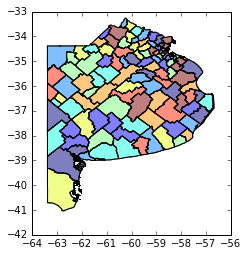

In [180]:
#dibujamos este mapa a modo de ejemplo
departamentos[departamentos['PROVINCIA']=='Buenos_Aires'].plot()

# Muy importante!
 
Las coordenadas en un mapa se dan en (lat, long) que no corresponden a las coordenadas cartesianas sino a (y,x) con lo cual es importante armar los **Point** con (long,lat), sino imposible comprarar quien esta dentro de que..

In [181]:
#es importante el orden long/lat
antenas_gpd =  raw_antennas[['LONGITUD','LATITUD']]
antenas_gpd = [shapely.geometry.Point(x) for x in antenas_gpd.values] 
global antenas_gpd 
antenas_gpd =  gpd.GeoSeries(antenas_gpd)

def point_intersects_geoseries(geo_point,geoseries):
    #entra la geotabla de deptos y un punto y hace un point in Poly p/ el punto contra todos los posibles poligonos
    
    ind = geoseries['geometry'].apply(lambda x: geo_point.intersects(x))
    #el resultante
    dep = geoseries[ind]
    #si no interseca nada
    if dep.shape[0]==0:
        rv0,rv1 = [[None],[None]]
    else:
        rv0 = dep['PROVINCIA'].values 
        rv1 = dep['DEPARTAMENTO'].values 
    
    rv = pd.Series({'PROVINCIA':rv0[0], 'DEPARTAMENTO':rv1[0]})
        
        #pd.Series({'feature1':s+1, 'feature2':s-1})
    return rv

In [182]:
%%time
df = antenas_gpd.apply(lambda point : \
                                                                point_intersects_geoseries(point,departamentos) )

CPU times: user 31.2 s, sys: 0 ns, total: 31.2 s
Wall time: 31.2 s


In [183]:
df.head(10)

,DEPARTAMENTO,PROVINCIA
0,None,None
1,La_Costa,Buenos_Aires
2,Ramallo,Buenos_Aires
3,Veinticinco_de_Mayo,Buenos_Aires
4,Veinticinco_de_Mayo,Buenos_Aires
5,Veinticinco_de_Mayo,Buenos_Aires
6,Nueve_de_Julio,Buenos_Aires
7,Nueve_de_Julio,Buenos_Aires
8,Nueve_de_Julio,Buenos_Aires
9,Adolfo_Alsina,Buenos_Aires


In [184]:
raw_antennas.head(10)

,CEL_DESCRIPTION,LATITUD,LONGITUD
CEL_ID,,,
AA001,ANTARTIDA_ARGENTINA,-64.2544,-56.6488
B1061,MUNDO_MARNO,-36.3390,-56.7468
B1062,BUNGE_RAMALLO,-33.4578,-60.0522
BA001,GOBERNADOR_UGARTE,-35.1641,-60.0866
BA003,25_DE_MAYO,-35.4275,-60.1538
BA004,DEL_VALLE,-35.9000,-60.7275
BA006,CARLOS_M_NAON,-35.2355,-60.8283
BA007,ADEMARCHI_(ESTQUIR,-35.2894,-61.3972
BA010,DUDIGNAC,-35.6458,-60.7036


In [185]:
departamentos.head()

,PROVINCIA,DEPARTAMENTO,FILENAME,geometry
0,Buenos_Aires,Adolfo_Alsina,Buenos_Aires-Adolfo_Alsina,POLYGON ((-63.28128433227539 -36.6123085021972...
1,Buenos_Aires,Adolfo_Gonzales_Chaves,Buenos_Aires-Adolfo_Gonzales_Chaves,POLYGON ((-60.45724487304688 -37.6021881103515...
2,Buenos_Aires,Alberti,Buenos_Aires-Alberti,POLYGON ((-60.24544143676758 -34.8256492614746...
3,Buenos_Aires,Almirante_Brown,Buenos_Aires-Almirante_Brown,POLYGON ((-58.33725738525385 -34.7585868835449...
4,Buenos_Aires,Ameghino,Buenos_Aires-Ameghino,"POLYGON ((-62.0881614685058 -34.9758415222168,..."


In [186]:
raw_antennas.shape,df.shape

((5815, 3), (5815, 2))

In [187]:
df.index = raw_antennas.index
test = pd.concat([raw_antennas,df],axis=1)

In [188]:
(test['DEPARTAMENTO'].isnull()).sum()

18

In [189]:
test[test['DEPARTAMENTO'].isnull()]

,CEL_DESCRIPTION,LATITUD,LONGITUD,DEPARTAMENTO,PROVINCIA
CEL_ID,,,,,
AA001,ANTARTIDA_ARGENTINA,-64.2544,-56.6488,None,None
BA346,SAN_CLEMENTE_2,-36.3580,-56.7130,None,None
BA997,TEST_SAN_VICENTE,-64.0000,-43.0000,None,None
C2159,ISLA_MARTIN_GARCIA,-34.2634,-58.1953,None,None
CB072,POLO_INGENTIS,-43.3666,-65.0000,None,None
CF257,COTO_MONTE_GRANDE,-58.4805,-34.7735,None,None
CF360,LIBERTAD_POI,-34.4116,-58.4116,None,None
CF365,ESTACION_MARINA,-58.3219,-34.2640,None,None
CF625,ESTACION_PADUA,-34.3952,-58.4220,None,None


## Estamos en el caso
* de las antenas "ficticias" o test
* de aquellas que viven en islas o similar
* de "las que se caen al agua"

In [577]:
test[test['DEPARTAMENTO'].isnull()].shape

(23, 5)

In [193]:
# eliminamos a a mano las de islas etc.
drops = ['AA001', 'BA346','BA997','C2159', 'CF257', 'CF365','TF023']
dropped_antennas += (drops)
#antartida, marambio, TEST antenna, TEST, isla m garcia, ocean point, ocean point , agua
for ant in drops:
    raw_antennas.drop(ant, axis=0,inplace=True) 


In [217]:
dropped_antennas = list(set(dropped_antennas))

len(dropped_antennas)

2221

In [218]:
raw_antennas2 =  pd.read_csv(antennas_file, 
                            #engine = 'python',
                            error_bad_lines=False,
                            warn_bad_lines=False)

In [196]:
raw_antennas2.head()

,CEL_ID,CEL_DESCRIPTION,LATITUD,LONGITUD
0,CO534D,CHATEAU - VILLA AGUR,-31.3703,-64.2403
1,CO534F,CHATEAU - VILLA AGUR,-31.3703,-64.2403
2,CO534X,CHATEAU - VILLA AGUR,-31.3703,-64.2403
3,CO535A,BARRIO EL ROSEDAL,-31.4353,-64.2248
4,CO535B,BARRIO EL ROSEDAL,-31.4353,-64.2248


In [197]:
dropped_file = 'data/celdas_dropped.csv'
dropped_antennas = pd.Series(dropped_antennas)
dropped_antennas.to_csv(dropped_file, index=False)

In [198]:
#los demas puntos los acomodamos

raw_antennas = raw_antennas.set_value("CB072",'LATITUD',-43.3766) #agua
raw_antennas = raw_antennas.set_value("CB072",'LONGITUD',-65.3000) #agua
raw_antennas = raw_antennas.set_value("CF360",'LATITUD',-34.4116) #agua
raw_antennas = raw_antennas.set_value("CF360",'LONGITUD',-58.5116) #agua

raw_antennas = raw_antennas.set_value("CF625",'LATITUD',-34.3952) #agua
raw_antennas = raw_antennas.set_value("CF625",'LONGITUD',-58.6220) #agua

raw_antennas = raw_antennas.set_value("CF653",'LATITUD',-34.4522) #rotado lat long
raw_antennas = raw_antennas.set_value("CF653",'LONGITUD',-58.6206) #rotado lat long

raw_antennas = raw_antennas.set_value("CF686",'LATITUD',-34.8149) #rotado lat long
raw_antennas = raw_antennas.set_value("CF686",'LONGITUD',-58.1534 ) #rotado lat long

raw_antennas = raw_antennas.set_value("CF977",'LATITUD',-34.5619) #agua
raw_antennas = raw_antennas.set_value("CF977",'LONGITUD',-58.468) #agua

raw_antennas = raw_antennas.set_value("CF962",'LATITUD',-34.3620) #agua
raw_antennas = raw_antennas.set_value("CF962",'LONGITUD',-58.7111) #agua
raw_antennas = raw_antennas.set_value("CR078",'LATITUD',-27.4707) #agua
raw_antennas = raw_antennas.set_value("CR078",'LONGITUD',-58.3881) #agua

raw_antennas = raw_antennas.set_value("JU086",'LATITUD',-23.2212) # frontera
raw_antennas = raw_antennas.set_value("JU086",'LONGITUD',-66.8716) # frontera
raw_antennas = raw_antennas.set_value("MI028",'LATITUD',-25.7798) # frontera
raw_antennas = raw_antennas.set_value("MI028",'LONGITUD',-54.5454) # frontera

raw_antennas = raw_antennas.set_value("MI208",'LATITUD',-25.7798) # frontera
raw_antennas = raw_antennas.set_value("MI208",'LONGITUD',-54.5454) # frontera

#raw_antennas = raw_antennas.set_value("",'LONGITUD', ) 
#raw_antennas = raw_antennas.set_value("",'LATITUD', ) 

In [199]:
raw_antennas.loc["CF686"]

CEL_DESCRIPTION      ABRIL
LATITUD           -34.8149
LONGITUD          -58.1534
Name: CF686, dtype: object

## recorremos
el df resultante p/detectar las null Ants

In [200]:
%%time

#es importante el orden long/lat
global antenas_gpd 
antenas_gpd =  raw_antennas[['LONGITUD','LATITUD']]
antenas_gpd = [shapely.geometry.Point(x) for x in antenas_gpd.values] 

antenas_gpd =  gpd.GeoSeries(antenas_gpd)

df = antenas_gpd.apply(lambda point : \
                                                                point_intersects_geoseries(point,departamentos) )

CPU times: user 32.1 s, sys: 0 ns, total: 32.1 s
Wall time: 32 s


In [201]:
df.index = raw_antennas.index
test = pd.concat([raw_antennas,df],axis=1)

In [202]:
test[test['DEPARTAMENTO'].isnull()]

,CEL_DESCRIPTION,LATITUD,LONGITUD,DEPARTAMENTO,PROVINCIA
CEL_ID,,,,,
TF023,NaN,-52.0,-68.666,None,None


In [203]:
#salvo con las antenas filtradas
df.index = raw_antennas.index
antennas = pd.concat([raw_antennas,df],axis=1)

In [204]:
antennas.sample(5)

,CEL_DESCRIPTION,LATITUD,LONGITUD,DEPARTAMENTO,PROVINCIA
CEL_ID,,,,,
RN201,GALLARDO_(MTSO),-41.1374,-71.3019,Bariloche,Rio_Negro
PA107,PUELCHES,-38.1463,-65.9093,Curaco,La_Pampa
BA201,CORREO_(BAHIA_B,-38.7186,-62.2673,Bahia_Blanca,Buenos_Aires
C1940,LA_DELFINA_2,-34.4706,-58.8762,Pilar,Buenos_Aires
C1620,TBA2_PASO_GASCO,-34.6111,-58.4246,Distrito_Federal,Ciudad_de_Buenos_Aires


In [213]:
antennas[antennas.isnull().any(axis=1)]

,CEL_DESCRIPTION,LATITUD,LONGITUD,DEPARTAMENTO,PROVINCIA
CEL_ID,,,,,


In [214]:
antennas.shape

(5808, 5)

## Ahora vemos cuales son del Gran Chaco

recordar que estas son las que estan en los estados de Jalisco, Oaxaca, Veracruz, Guerrero,Morelos, Yucatan, Queretaro, Chiapas, Puebla, Nayarit, Hidalgo y Tabasco.

In [223]:
granchaco = gpd.GeoDataFrame.from_file(rootdir+'data/ambientes-gc.geojson')

In [224]:
granchaco['Name'] = granchaco['Name'].apply(lambda x :preparar_depto(x))

In [225]:
granchaco.head()

,Name,geometry
0,De_Ypoa,(POLYGON Z ((-57.34032646299994 -26.1691885919...
1,Esteros_del_Ibera,(POLYGON Z ((-58.48979397799991 -28.9349022039...
2,Parque_Chaqueno_Correntino,(POLYGON Z ((-58.89141810099994 -29.52623415 0...
3,Transicion_Chaco_Pantanal,(POLYGON Z ((-58.0025808179999 -19.23088413899...
4,Valle_fluvial_de_los_Rios_Parana_y_Paraguay,(POLYGON Z ((-59.39807189299995 -29.4095258589...


In [226]:
def geom_intersects_granchaco_series(geom,geoseries):
    #entra la geotabla de deptos y un punto y hace un point in Poly p/ el punto contra todos los posibles poligonos
    
    ind = geoseries['geometry'].apply(lambda x: geom.intersects(x))
    #el resultante
    dep = geoseries[ind]
    #si no interseca nada
    if dep.shape[0]==0:
        rv = "NOT_GC"
    else:
        rv = dep['Name'].values[0]
    
    rv = pd.Series({'GC_AREA':rv})
        
        #pd.Series({'feature1':s+1, 'feature2':s-1})
    return rv

In [227]:
%%time

#es importante el orden long/lat
global antenas_gpd 
antenas_gpd =  antennas[['LONGITUD','LATITUD']]
antenas_gpd = [shapely.geometry.Point(x) for x in antenas_gpd.values] 

antenas_gpd =  gpd.GeoSeries(antenas_gpd)

antennas['GC_AREA'] = (antenas_gpd.apply(lambda point : \
                                                        geom_intersects_granchaco_series(point,granchaco) )).values

CPU times: user 7.81 s, sys: 4 ms, total: 7.81 s
Wall time: 7.8 s


In [229]:
antennas.shape

(5806, 6)

In [230]:
# vemos la frecuencia de las antennas en estas areas epidemicas
antennas['GC_AREA'].value_counts()

NOT_GC                                                                  4968
Bosques_arbustales_del_centro_(con_jarilla_Larrea)                       190
Chaco_Serrano_Puntano_Cordobes                                           106
Chaco_de_los_Llanos_y_Valles_Interserranos                                87
Parque_Chaqueno_Correntino                                                74
Transicion_Chaco_Monte                                                    60
Del_Chaco_oriental_del_Bajo_Rio_Paraguay                                  59
Bosque_austral_de_dos_quebrachos                                          50
Chaco_sub_humedo_central                                                  42
Del_Dorsal_Oriental                                                       35
Chaco_de_canadas_y_bosques                                                28
Antiguos_cauces_del_Juramento_Salado                                      16
Interfluvio_del_Bermejo-Pilcomayo                                         16

In [232]:
antennas['EPIDEMIC'] = (~(antennas['GC_AREA'] == "NOT_GC")).astype(int)

antennas.sample(10)

,CEL_DESCRIPTION,LATITUD,LONGITUD,DEPARTAMENTO,PROVINCIA,GC_AREA,EPIDEMIC
CEL_ID,,,,,,,
PA062,QUEMU_QUEMU_NVO,-36.0601,-63.5675,Quemu_Quemu,La_Pampa,NOT_GC,0
CF664,PILAR_DEL_ESTE,-34.3819,-58.8725,Pilar,Buenos_Aires,NOT_GC,0
BA768,BRAGADO_3,-35.1155,-60.5027,Bragado,Buenos_Aires,NOT_GC,0
C1729,AGRONOMIA_5,-34.5805,-58.4843,Distrito_Federal,Ciudad_de_Buenos_Aires,NOT_GC,0
CO761,CEMENT_JERONIMO,-31.4047,-64.2099,Capital,Cordoba,NOT_GC,0
CF839,AVDA_7_Y_CALLE_48,-34.9140,-57.9508,La_Plata,Buenos_Aires,NOT_GC,0
BAR06,RUTA11_(LA_DIANA),-37.4319,-57.2388,General_Juan_Madariaga,Buenos_Aires,NOT_GC,0
C1588,COUNTRY_HIGHLAN,-34.4237,-58.7951,Pilar,Buenos_Aires,NOT_GC,0
CF434,CAC_BELGRANO,-34.5572,-58.4606,Distrito_Federal,Ciudad_de_Buenos_Aires,NOT_GC,0


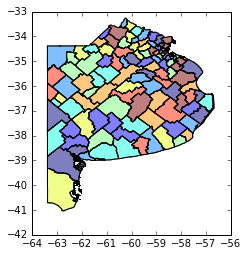

In [233]:
departamentos[departamentos['PROVINCIA']=='Buenos_Aires'].plot()

In [693]:
#chequeo que no haya antenas repetidas
len(np.unique(antennas.index.values))==len(antennas.index.values)

True

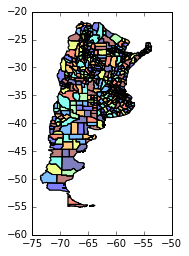

In [694]:
departamentos.plot()

In [235]:
antennas_file_out
antennas.to_csv(antennas_file_out,index=True,sep="|", encoding='utf-8')
!head -n10 $antennas_file_out

CEL_ID|CEL_DESCRIPTION|LATITUD|LONGITUD|DEPARTAMENTO|PROVINCIA|GC_AREA|EPIDEMIC
B1061|MUNDO_MARNO|-36.339|-56.7468|La_Costa|Buenos_Aires|NOT_GC|0
B1062|BUNGE_RAMALLO|-33.4578|-60.0522|Ramallo|Buenos_Aires|NOT_GC|0
BA001|GOBERNADOR_UGARTE|-35.1641|-60.0866|Veinticinco_de_Mayo|Buenos_Aires|NOT_GC|0
BA003|25_DE_MAYO|-35.4275|-60.1538|Veinticinco_de_Mayo|Buenos_Aires|NOT_GC|0
BA004|DEL_VALLE|-35.9|-60.7275|Veinticinco_de_Mayo|Buenos_Aires|NOT_GC|0
BA006|CARLOS_M_NAON|-35.2355|-60.8283|Nueve_de_Julio|Buenos_Aires|NOT_GC|0
BA007|ADEMARCHI_(ESTQUIR|-35.2894|-61.3972|Nueve_de_Julio|Buenos_Aires|NOT_GC|0
BA010|DUDIGNAC|-35.6458|-60.7036|Nueve_de_Julio|Buenos_Aires|NOT_GC|0
BA013|RIVERA|-37.1577|-63.2363|Adolfo_Alsina|Buenos_Aires|NOT_GC|0


In [238]:
#set endemicity per department
a = (departamentos['geometry'].apply(lambda point : \
                                          geom_intersects_granchaco_series(point,granchaco) ).values) 
a = a.flatten()

departamentos['EPIDEMIC'] = (a!= "NOT_GC")


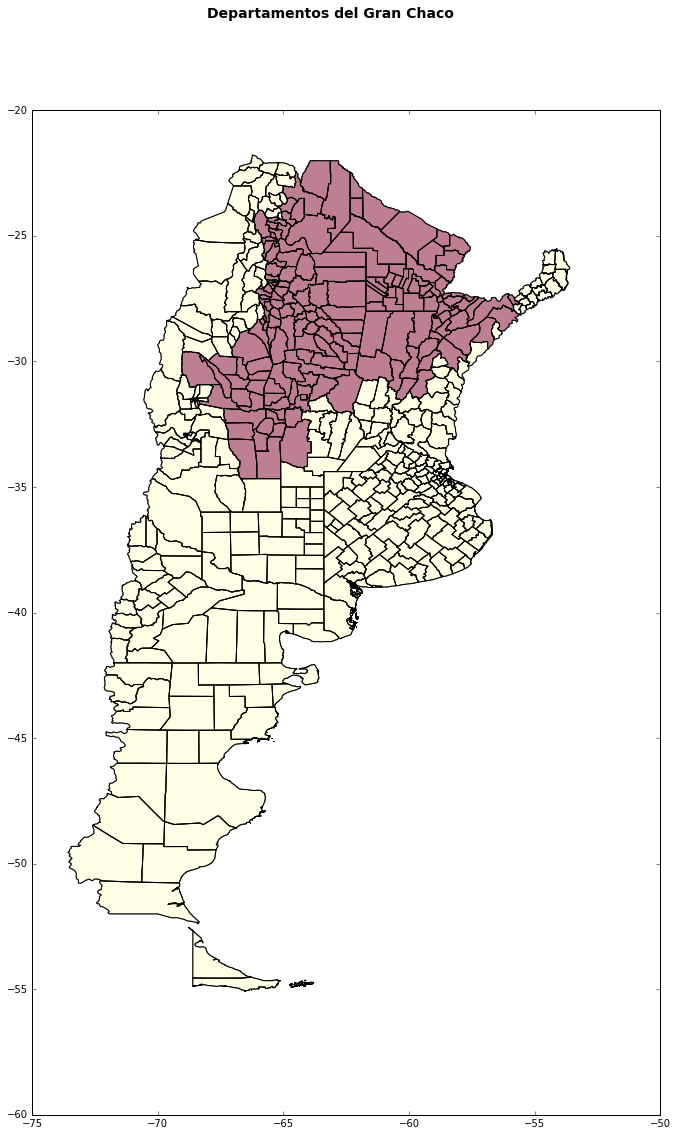

In [241]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(18,18),dpi=300)
fig.suptitle('Departamentos del Gran Chaco', fontsize=14, fontweight='bold')

kw = dict(column="EPIDEMIC",k=6,colormap='YlOrRd')
departamentos.plot(scheme = "Quantiles",**kw)



In [2]:
!head ../mobility-study/mapa/data/antenna_data_limpiojuan.csv

2105|-37.1872|-62.7575|Fuera_GC|0|Buenos_Aires-Adolfo_Alsina
3413|-37.1577|-63.2363|Fuera_GC|0|Buenos_Aires-Adolfo_Alsina
3487|-36.8036|-63.3382|Fuera_GC|0|Buenos_Aires-Adolfo_Alsina
1664|-38.0286|-60.0994|Fuera_GC|1|Buenos_Aires-Adolfo_Gonzales_Chaves
3169|-37.9641|-60.4202|Fuera_GC|1|Buenos_Aires-Adolfo_Gonzales_Chaves
3172|-37.9166|-60.068|Fuera_GC|1|Buenos_Aires-Adolfo_Gonzales_Chaves
1673|-34.8388|-60.3089|Fuera_GC|2|Buenos_Aires-Alberti
1912|-35.0319|-60.279|Fuera_GC|2|Buenos_Aires-Alberti
1930|-35.038|-60.2883|Fuera_GC|2|Buenos_Aires-Alberti
3275|-35.0747|-60.4014|Fuera_GC|2|Buenos_Aires-Alberti


In [36]:
!head $arg_dir

surr_id|latitude|longitude|subregion|departamento
2057|-32.0161|-61.23||453
2989|-31.2539|-60.7594||447
3347|-28.8316|-59.6502|Del Dorsal Oriental|445
3057|-30.9383|-61.57||441
3762|-31.093|-61.9055||441
4345|-34.602|-58.3752||184
2095|-34.8921|-57.9101||15
1705|-32.692|-63.4349||190
82|-34.4956|-58.498||110


In [250]:
### ADD surrogate antennas latitude/longitude info from caro's processed dataset

# read files
arg_dir = "../mobility-study/mapa/data/antenna_data.csv"

old_antennas = pd.read_csv(arg_dir, sep="|",
                            #engine = 'python',
                           header = 0
                            )

antennas = pd.read_csv(antennas_file_out, sep = "|",
                            #engine = 'python', 
                            )
old_antennas.columns = old_antennas.columns.str.upper()
#old_antennas.drop('EPIDEMIC',axis=1,inplace=True)
old_antennas['SURR_ID'] = old_antennas['SURR_ID'].astype(np.uint32)
#old_antennas['DEPARTAMENTO'] = old_antennas['DEPARTAMENTO'].astype(np.uint32)
old_antennas.rename(columns={'LATITUDE':'LATITUD','LONGITUDE':'LONGITUD'},inplace=True)

In [251]:
antennas.head()

,CEL_ID,CEL_DESCRIPTION,LATITUD,LONGITUD,DEPARTAMENTO,PROVINCIA,GC_AREA,EPIDEMIC
0,B1061,MUNDO_MARNO,-36.3390,-56.7468,La_Costa,Buenos_Aires,NOT_GC,0
1,B1062,BUNGE_RAMALLO,-33.4578,-60.0522,Ramallo,Buenos_Aires,NOT_GC,0
2,BA001,GOBERNADOR_UGARTE,-35.1641,-60.0866,Veinticinco_de_Mayo,Buenos_Aires,NOT_GC,0
3,BA003,25_DE_MAYO,-35.4275,-60.1538,Veinticinco_de_Mayo,Buenos_Aires,NOT_GC,0
4,BA004,DEL_VALLE,-35.9000,-60.7275,Veinticinco_de_Mayo,Buenos_Aires,NOT_GC,0


In [252]:
old_antennas.head()

,SURR_ID,LATITUD,LONGITUD,SUBREGION,DEPARTAMENTO
0,2057,-32.0161,-61.2300,NaN,453.0
1,2989,-31.2539,-60.7594,NaN,447.0
2,3347,-28.8316,-59.6502,Del Dorsal Oriental,445.0
3,3057,-30.9383,-61.5700,NaN,441.0
4,3762,-31.0930,-61.9055,NaN,441.0


In [271]:
# a modo de ejemplo vemos cuantas veces se repiten los pares (long, lat)
a = old_antennas[['LATITUD','LONGITUD']].values
b = np.ascontiguousarray(a).view(np.dtype((np.void, a.dtype.itemsize * a.shape[1])))
unique_a = np.unique(b).view(a.dtype).reshape(-1, a.shape[1])
unique_a.shape, a.shape

((4501, 2), (4520, 2))

In [272]:
a = antennas[['LATITUD','LONGITUD']].values
b = np.ascontiguousarray(a).view(np.dtype((np.void, a.dtype.itemsize * a.shape[1])))
unique_a = np.unique(b).view(a.dtype).reshape(-1, a.shape[1])
unique_a.shape, a.shape

((5691, 2), (5806, 2))

In [253]:
test =  pd.merge(antennas,old_antennas,on = ['LATITUD','LONGITUD'],how='outer')

In [255]:
test.sample(20)

,CEL_ID,CEL_DESCRIPTION,LATITUD,LONGITUD,DEPARTAMENTO_x,PROVINCIA,GC_AREA,EPIDEMIC,SURR_ID,SUBREGION,DEPARTAMENTO_y
6220,NaN,NaN,-34.7323,-58.5327,NaN,NaN,NaN,NaN,2723.0,NaN,62.0
4055,FO201,FORMOSA,-26.1504,-58.1585,Formosa,Formosa,Del_Chaco_oriental_del_Bajo_Rio_Paraguay,1.0,3977.0,Del Chaco oriental del Bajo Rio Paraguay,254.0
524,BA781,CORONEL_SUAREZ_3,-37.4535,-61.9285,Coronel_Suarez,Buenos_Aires,NOT_GC,0.0,NaN,NaN,NaN
2331,CF223,TORCUATO_ICP_(EX_CF,-34.4807,-58.6309,Tigre,Buenos_Aires,NOT_GC,0.0,NaN,NaN,NaN
2984,CH111,LA_LEONESA_NUEVO,-27.0389,-58.7141,Bermejo,Chaco,Del_Chaco_oriental_del_Bajo_Rio_Paraguay,1.0,NaN,NaN,NaN
3956,ER210,DOMINGUEZ,-31.9874,-58.9628,Villaguay,Entre_Rios,NOT_GC,0.0,3863.0,NaN,252.0
102,BA146,ROJAS,-34.1858,-60.7441,Rojas,Buenos_Aires,NOT_GC,0.0,NaN,NaN,NaN
6751,NaN,NaN,-34.5844,-58.8312,NaN,NaN,NaN,NaN,1953.0,NaN,81.0
5898,NaN,NaN,-24.5304,-24.5304,NaN,NaN,NaN,NaN,1771.0,NaN,NaN
6318,NaN,NaN,-36.6096,-64.2809,NaN,NaN,NaN,NaN,2442.0,NaN,280.0


In [257]:
test.shape

(6893, 11)

In [258]:
antennas.shape

(5806, 8)

In [259]:
test[test['CEL_ID'].isnull()].shape

(1056, 11)

In [260]:
test[test['CEL_ID'].isnull()]

,CEL_ID,CEL_DESCRIPTION,LATITUD,LONGITUD,DEPARTAMENTO_x,PROVINCIA,GC_AREA,EPIDEMIC,SURR_ID,SUBREGION,DEPARTAMENTO_y
5837,NaN,NaN,-34.6210,-58.6711,NaN,NaN,NaN,NaN,2455.0,NaN,82.0
5838,NaN,NaN,-34.9247,-57.9375,NaN,NaN,NaN,NaN,94.0,NaN,63.0
5839,NaN,NaN,-34.6143,-58.4201,NaN,NaN,NaN,NaN,55.0,NaN,184.0
5840,NaN,NaN,-34.6083,-58.3748,NaN,NaN,NaN,NaN,293.0,NaN,184.0
5841,NaN,NaN,-34.6034,-58.4001,NaN,NaN,NaN,NaN,1362.0,NaN,184.0
5842,NaN,NaN,-31.4442,-64.5030,NaN,NaN,NaN,NaN,244.0,Chaco Serrano Puntano Cordobes,205.0
5843,NaN,NaN,-34.5878,-58.3999,NaN,NaN,NaN,NaN,349.0,NaN,184.0
5844,NaN,NaN,-40.8083,-65.0900,NaN,NaN,NaN,NaN,2384.0,NaN,379.0
5845,NaN,NaN,-34.2327,-61.1111,NaN,NaN,NaN,NaN,2988.0,NaN,43.0
5846,NaN,NaN,-35.0842,-57.5028,NaN,NaN,NaN,NaN,1774.0,NaN,73.0


In [57]:
len(test['SURR_ID'].unique()) ,len(old_antennas)

(4521, 4520)

In [58]:
test[test['SURR_ID'].isnull()].shape, test[test['CEL_ID'].isnull()].shape

((2346, 11), (1025, 11))